# <center>Multivariate Linear Regression on House Pricing Data</center>

### <center>Source: Kaggle - House Prices: Advanced Regression Techniques
## <center>[Kaggle DataSet](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)</center>


In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from numpy.polynomial.polynomial import polyfit
from pandas import Series
import matplotlib.pylab as plt
from statsmodels.compat import lzip

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Engineering

In [20]:
traindf = pd.read_csv('train.csv')

In [21]:
len(traindf)

1460

In [22]:
#traindf.columns

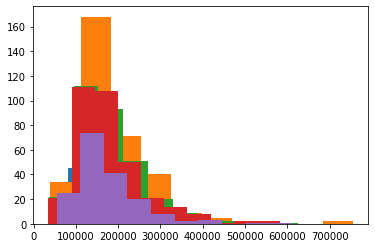

In [23]:
dates = list(traindf['YrSold'].unique())
for i in dates:
    data = traindf.loc[traindf['YrSold'] == i]
    plt.hist(data['SalePrice'])

## Add average mortgage rate data onto the existing data

In [24]:
date_dict = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6',
                 'Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}

In [25]:
rate_data = open('rate_data.txt', 'r')
rate_list = []
date_list = []
for x in rate_data:
    x = x.replace('\n','')
    x = x.replace('\t',',')
    for i in date_dict.keys():
        x = x.replace(f'{i}', date_dict[f'{i}'])
    x = x.split(',')
    rate_list.append(x)
rate_list[:5]
rate_df = pd.DataFrame(rate_list, columns=['date', 'rate'])

In [26]:
date_list = []
for i in range(len(traindf)):
    date_list.append(str(traindf['MoSold'][i]) +'-' + str(traindf['YrSold'][i]))
traindf['date'] = pd.Series(date_list)

In [27]:
traindf = pd.merge(traindf, rate_df, how='inner', on='date')

In [28]:
traindf['rate'] = traindf['rate'].astype(float)
traindf.drop('date', axis=1, inplace=True)

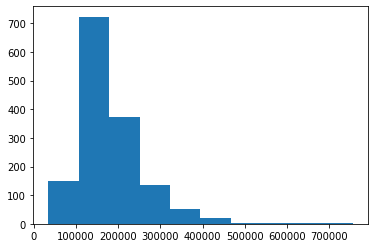

In [29]:
plt.hist(traindf['SalePrice']);

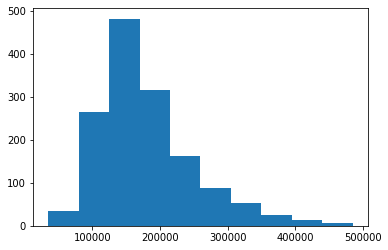

In [596]:
traindf = traindf.loc[traindf['SalePrice'] < 500000]
plt.hist(traindf['SalePrice']);

In [31]:
pd.read_csv('New_construction.csv')

,year,new_single_family_homes,new_multi_family buildings,new_multi_family_units;
0,2001,132,10,157;
1,2002,175,30,573;
2,2003,264,13,336;
3,2004,224,21,413;
4,2005,240,31,561;
5,2006,161,13,228;
6,2007,127,6,116;
7,2008,70,11,201;
8,2009,61,0,0;
9,2010,58,3,95;


#### Removing data with more than 30% NAN values 

In [597]:
drop_list = ['Exterior2nd', 'YearRemodAdd', 'LotShape', 'MSSubClass', 'TotalBsmtSF', 'Alley', 'GarageYrBlt', 'PoolQC', 'MiscFeature', 'MiscFeature']

#### Moving Sale Price over to targetdf

In [598]:
targetdf = traindf[['Id', 'SalePrice']]
traindf.drop('SalePrice', axis=1, inplace=True)

#### Removing problematic columns

In [599]:
traindf = traindf.drop(drop_list, axis=1)

#### Seperating the catagorical and numerical data

In [600]:
traindf_cat = traindf[['Id', 'MSZoning']].copy()
traindf.drop('MSZoning', axis=1, inplace=True)

In [601]:
lotfront = traindf.LotFrontage.mean()

### Replacing NA values with the mean value for the column

In [602]:
traindf.LotFrontage.fillna(value=lotfront, inplace=True)

In [603]:
traindf_cat.FireplaceQu = traindf.FireplaceQu
traindf_cat.FireplaceQu.fillna(value='None', inplace=True)
traindf.drop('FireplaceQu', axis = 1, inplace=True)

In [604]:
traindf_cat['Street'] = traindf.Street
traindf.drop('Street', axis=1, inplace=True)

In [605]:
traindf_cat['LandContour'] = traindf.LandContour
traindf.drop('LandContour', axis=1, inplace=True)

In [606]:
traindf_cat['Utilities'] = traindf.Utilities
traindf.drop('Utilities', axis=1, inplace=True)

In [607]:
traindf_cat['LotConfig'] = traindf.LotConfig
traindf.drop('LotConfig', axis=1, inplace=True)

In [608]:
traindf_cat['LandSlope'] = traindf.LandSlope
traindf.drop('LandSlope', axis=1, inplace=True)

In [609]:
traindf_cat['Neighborhood'] = traindf.Neighborhood
traindf.drop('Neighborhood', axis=1, inplace=True)

In [610]:
traindf_cat['Condition1'] = traindf.Condition1
traindf.drop('Condition1', axis=1, inplace=True)

traindf_cat['Condition2'] = traindf.Condition2
traindf.drop('Condition2', axis=1, inplace=True)

In [611]:
traindf_cat['BldgType'] = traindf.BldgType
traindf.drop('BldgType', axis=1, inplace=True)

In [612]:
traindf_cat['HouseStyle'] = traindf.HouseStyle
traindf.drop('HouseStyle', axis=1, inplace=True)

In [613]:
traindf_cat['RoofStyle'] = traindf.RoofStyle
traindf.drop('RoofStyle', axis=1, inplace=True)

In [614]:
traindf_cat['RoofMatl'] = traindf.RoofMatl
traindf.drop('RoofMatl', axis=1, inplace=True)

In [615]:
traindf_cat['Exterior1st'] = traindf.Exterior1st
traindf.drop('Exterior1st', axis=1, inplace=True)

#traindf_cat['Exterior2nd'] = traindf.Exterior2nd
#traindf.drop('Exterior2nd', axis=1, inplace=True)

In [616]:
traindf.MasVnrType.fillna(value='None', inplace=True)
traindf_cat['MasVnrType'] = traindf.MasVnrType
traindf.drop('MasVnrType', axis=1, inplace=True)

In [617]:
traindf_cat.ExterQual = traindf.ExterQual
traindf.drop('ExterQual', axis=1, inplace=True)

In [618]:
traindf_cat.ExterCond = traindf.ExterCond 
traindf.drop('ExterCond', axis=1, inplace=True)

In [619]:
traindf_cat['Foundation'] = traindf.Foundation
traindf.drop('Foundation', axis=1, inplace=True)

In [620]:
traindf.MasVnrArea.fillna(value=0.00, inplace=True) 

In [621]:
traindf_cat.BsmtCond = traindf.BsmtCond
traindf.drop('BsmtCond', axis=1, inplace=True)

In [622]:
traindf_cat.BsmtFinType1 = traindf.BsmtFinType1
traindf.drop('BsmtFinType1', axis=1, inplace=True)

In [623]:
traindf_cat.BsmtExposure = traindf.BsmtExposure
traindf.drop('BsmtExposure', axis=1, inplace=True)

In [624]:
traindf_cat.BsmtQual = traindf.BsmtQual
traindf.drop('BsmtQual',axis=1, inplace=True)

In [625]:
traindf_cat.BsmtFinType2 = traindf.BsmtFinType2
traindf.drop('BsmtFinType2', axis=1, inplace=True)

In [626]:
traindf_cat['Heating'] = traindf.Heating
traindf.drop('Heating', axis=1, inplace=True)

In [627]:
traindf.HeatingQC = traindf.HeatingQC
traindf.drop('HeatingQC', axis=1, inplace=True)

In [628]:
traindf_cat['CentralAir'] = traindf.CentralAir
traindf.drop('CentralAir', axis=1, inplace=True)

In [629]:
traindf_cat['Electrical'] = traindf.Electrical
traindf.drop('Electrical', axis=1, inplace=True)
traindf_cat.Electrical.fillna(value='None', inplace=True)

In [630]:
traindf_cat.KitchenQual = traindf.KitchenQual
traindf.drop('KitchenQual', axis=1, inplace=True)

In [631]:
traindf_cat['Functional'] = traindf.Functional
traindf.drop('Functional', axis=1, inplace=True)

In [632]:
traindf_cat['GarageType'] = traindf.GarageType
traindf.drop('GarageType', axis=1, inplace=True)
traindf_cat.GarageType.fillna(value='NoGarage', inplace=True)

In [633]:
traindf_cat.GarageFinish = traindf.GarageFinish
traindf.drop('GarageFinish', axis=1, inplace=True)

In [634]:
traindf_cat.GarageQual = traindf.GarageQual
traindf.drop('GarageQual', axis=1, inplace=True)

In [635]:
traindf_cat.GarageCond = traindf.GarageCond
traindf.drop('GarageCond',axis=1, inplace=True)

In [636]:
traindf_cat['PavedDrive'] = traindf.PavedDrive
traindf.drop('PavedDrive', axis=1, inplace=True)

In [637]:
traindf_cat['Fence'] = traindf.Fence
traindf.drop('Fence', axis=1, inplace=True)
traindf_cat.fillna(value='NoFence', inplace=True)

In [638]:
traindf_cat['MoSold'] = traindf.MoSold
traindf.drop('MoSold', axis=1, inplace=True)

In [639]:
traindf_cat['SaleType'] = traindf.SaleType
traindf.drop('SaleType', axis=1, inplace=True)

In [640]:
traindf_cat['SaleCondition'] = traindf.SaleCondition
traindf.drop('SaleCondition', axis=1, inplace=True)

In [641]:
traindf_cat['BsmtFullBath'] = traindf.BsmtFullBath
traindf.drop('BsmtFullBath', axis=1, inplace=True)

In [642]:
traindf_cat['BsmtHalfBath'] = traindf.BsmtHalfBath
traindf.drop('BsmtHalfBath', axis=1, inplace=True)

In [643]:
traindf_cat['FullBath'] = traindf.FullBath
traindf.drop('FullBath', axis=1, inplace=True)

In [644]:
traindf_cat['HalfBath'] = traindf.HalfBath
traindf.drop('HalfBath', axis=1, inplace=True)

In [645]:
traindf_cat['BedroomAbvGr'] = traindf.BedroomAbvGr
traindf.drop('BedroomAbvGr', axis=1, inplace=True)

In [646]:
traindf_cat['KitchenAbvGr'] = traindf.KitchenAbvGr
traindf.drop('KitchenAbvGr', axis=1, inplace=True)

In [647]:
traindf_cat['TotRmsAbvGrd'] = traindf.TotRmsAbvGrd
traindf.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [648]:
traindf_cat['Fireplaces'] = traindf.Fireplaces
traindf.drop('Fireplaces', axis=1, inplace=True)

In [649]:
traindf_cat['GarageCars'] = traindf.GarageCars
traindf.drop('GarageCars', axis=1, inplace=True)

In [650]:
traindf['ThreeSsnPorch'] = traindf['3SsnPorch']
traindf.drop('3SsnPorch', axis=1, inplace=True)

In [651]:
traindf['FirstFlrSF'] = traindf['1stFlrSF']
traindf.drop('1stFlrSF', axis=1, inplace=True)

In [652]:
traindf['SecondFlrSF'] = traindf['2ndFlrSF']
traindf.drop('2ndFlrSF', axis=1, inplace=True)

## Feature Scaling - Apply Box-Cox?
### Box-Cox did not improve the model

In [653]:
traindf_cat.shape

(1451, 36)

In [654]:
traindf_columns = traindf.columns

In [655]:
traindf.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,rate,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,730.079256,69.833054,10442.747760,6.079256,5.578222,1971.071675,99.972433,437.809097,46.466575,566.076499,...,46.455548,22.090283,14.760165,2.393522,43.758787,2007.813921,6.257787,3.430737,1156.673329,342.745003
std,422.163067,21.842884,9916.673175,1.362524,1.115370,30.189728,173.498236,447.757832,161.264463,440.565397,...,66.345854,61.283981,55.342585,37.599673,497.648467,1.326587,0.597619,29.406940,379.591002,429.825177
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,4.957000,0.000000,334.000000,0.000000
25%,364.500000,60.000000,7517.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,222.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,5.678000,0.000000,882.000000,0.000000
50%,729.000000,69.833054,9452.000000,6.000000,5.000000,1972.000000,0.000000,381.000000,0.000000,476.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,6.476000,0.000000,1085.000000,0.000000
75%,1095.500000,78.500000,11506.000000,7.000000,6.000000,2000.000000,160.500000,705.500000,0.000000,808.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,6.825000,0.000000,1382.500000,728.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,547.000000,552.000000,480.000000,738.000000,15500.000000,2010.000000,7.008000,508.000000,4692.000000,1818.000000


In [656]:
#traindf = traindf + 1
traindf.min()

Id                  1.000
LotFrontage        21.000
LotArea          1300.000
OverallQual         1.000
OverallCond         1.000
YearBuilt        1872.000
MasVnrArea          0.000
BsmtFinSF1          0.000
BsmtFinSF2          0.000
BsmtUnfSF           0.000
LowQualFinSF        0.000
GrLivArea         334.000
GarageArea          0.000
WoodDeckSF          0.000
OpenPorchSF         0.000
EnclosedPorch       0.000
ScreenPorch         0.000
PoolArea            0.000
MiscVal             0.000
YrSold           2006.000
rate                4.957
ThreeSsnPorch       0.000
FirstFlrSF        334.000
SecondFlrSF         0.000
dtype: float64

In [657]:
import scipy.stats
low_vals = []
box = ['LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'ThreeSsnPorch', 'FirstFlrSF', 'SecondFlrSF']
box1 = 'OverallCond'
for ox in box:
    print(f"traindf['{ox}'] = stats.boxcox(traindf['{ox}'])[0]")
    print(traindf[f'{ox}'].min(), ox)

traindf['LotArea'] = stats.boxcox(traindf['LotArea'])[0]
1300 LotArea
traindf['OverallCond'] = stats.boxcox(traindf['OverallCond'])[0]
1 OverallCond
traindf['YearBuilt'] = stats.boxcox(traindf['YearBuilt'])[0]
1872 YearBuilt
traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
0.0 MasVnrArea
traindf['BsmtFinSF1'] = stats.boxcox(traindf['BsmtFinSF1'])[0]
0 BsmtFinSF1
traindf['BsmtFinSF2'] = stats.boxcox(traindf['BsmtFinSF2'])[0]
0 BsmtFinSF2
traindf['BsmtUnfSF'] = stats.boxcox(traindf['BsmtUnfSF'])[0]
0 BsmtUnfSF
traindf['WoodDeckSF'] = stats.boxcox(traindf['WoodDeckSF'])[0]
0 WoodDeckSF
traindf['OpenPorchSF'] = stats.boxcox(traindf['OpenPorchSF'])[0]
0 OpenPorchSF
traindf['EnclosedPorch'] = stats.boxcox(traindf['EnclosedPorch'])[0]
0 EnclosedPorch
traindf['ScreenPorch'] = stats.boxcox(traindf['ScreenPorch'])[0]
0 ScreenPorch
traindf['PoolArea'] = stats.boxcox(traindf['PoolArea'])[0]
0 PoolArea
traindf['MiscVal'] = stats.boxcox(traindf['MiscVal'])[0]
0 MiscVal
traindf['YrSold'

In [658]:
#traindf['LotArea'] = stats.boxcox(traindf['LotArea'])[0]
#traindf['YearBuilt'] = stats.boxcox(traindf['YearBuilt'])[0]
#traindf['OverallCond'] = stats.boxcox(traindf['OverallCond'])[0]
#traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
#traindf['BsmtFinSF1'] = stats.boxcox(traindf['BsmtFinSF1'])[0]
#traindf['BsmtFinSF2'] = stats.boxcox(traindf['BsmtFinSF2'])[0]
#traindf['BsmtUnfSF'] = stats.boxcox(traindf['BsmtUnfSF'])[0]
#traindf['WoodDeckSF'] = stats.boxcox(traindf['WoodDeckSF'])[0]
#traindf['OpenPorchSF'] = stats.boxcox(traindf['OpenPorchSF'])[0]
#traindf['EnclosedPorch'] = stats.boxcox(traindf['EnclosedPorch'])[0]
#traindf['ScreenPorch'] = stats.boxcox(traindf['ScreenPorch'])[0]
#traindf['PoolArea'] = stats.boxcox(traindf['PoolArea'])[0]
#traindf['MiscVal'] = stats.boxcox(traindf['MiscVal'])[0]
#traindf['YrSold'] = stats.boxcox(traindf['YrSold'])[0]
#traindf['ThreeSsnPorch'] =x stats.boxcox(traindf['ThreeSsnPorch'])[0]
#traindf['FirstFlrSF'] = stats.boxcox(traindf['FirstFlrSF'])[0]
#traindf['SecondFlrSF'] = stats.boxcox(traindf['SecondFlrSF'])[0]

In [659]:
#x = traindf['MasVnrArea'].replace(0, 'nan')
#l = stats.boxcox(x.dropna())[1]


In [660]:
#traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
traindf.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,rate,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,730.079256,69.833054,10442.747760,6.079256,5.578222,1971.071675,99.972433,437.809097,46.466575,566.076499,...,46.455548,22.090283,14.760165,2.393522,43.758787,2007.813921,6.257787,3.430737,1156.673329,342.745003
std,422.163067,21.842884,9916.673175,1.362524,1.115370,30.189728,173.498236,447.757832,161.264463,440.565397,...,66.345854,61.283981,55.342585,37.599673,497.648467,1.326587,0.597619,29.406940,379.591002,429.825177
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,4.957000,0.000000,334.000000,0.000000
25%,364.500000,60.000000,7517.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,222.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,5.678000,0.000000,882.000000,0.000000
50%,729.000000,69.833054,9452.000000,6.000000,5.000000,1972.000000,0.000000,381.000000,0.000000,476.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,6.476000,0.000000,1085.000000,0.000000
75%,1095.500000,78.500000,11506.000000,7.000000,6.000000,2000.000000,160.500000,705.500000,0.000000,808.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,6.825000,0.000000,1382.500000,728.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,547.000000,552.000000,480.000000,738.000000,15500.000000,2010.000000,7.008000,508.000000,4692.000000,1818.000000


In [661]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

ss = StandardScaler()

traindfss = pd.DataFrame(ss.fit_transform(traindf))
traindfss.set_index(traindf.Id, inplace=True)
traindfss.columns = traindf_columns 
# Remove outliers, i.e. data points outside of 2 standard deviations of the mean
traindfss = traindfss[(np.abs(stats.zscore(traindfss)) < 2).all(axis=1)]
#X_train_numeric.head()

In [662]:
traindfss.drop('Id', axis=1, inplace=True)

In [663]:
traindfss.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,rate,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,671.000000,671.000000,6.710000e+02,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,-0.124084,-0.125052,-0.085542,-0.132308,0.183104,-0.203927,-0.018082,-0.225772,-0.074196,-0.114109,...,-0.162050,-0.240214,-0.232370,-6.367999e-02,-0.059580,-0.010273,-0.008594,-0.115538,-0.223880,-0.076174
std,0.629895,0.348166,0.813246,0.666966,0.877777,0.603891,0.849301,0.294046,0.854529,0.098785,...,0.657679,0.441905,0.254833,2.083221e-16,0.173798,1.020566,1.006203,0.030204,0.705254,0.909955
min,-1.824246,-0.854285,-1.526558,-1.415464,-1.924221,-0.576415,-0.978118,-0.288238,-1.285329,-0.120619,...,-0.700444,-0.360582,-0.266797,-6.367999e-02,-0.087961,-1.367831,-1.887785,-0.116704,-1.677840,-0.797681
25%,-0.450327,-0.325801,-0.792373,-0.518592,-0.466269,-0.576415,-0.978118,-0.288238,-0.752875,-0.120619,...,-0.700444,-0.360582,-0.266797,-6.367999e-02,-0.087961,-0.613757,-0.970496,-0.116704,-0.771289,-0.797681
50%,0.000000,-0.152598,-0.058188,-0.518592,0.229572,-0.576415,0.009363,-0.288238,-0.243127,-0.120619,...,-0.368734,-0.360582,-0.266797,-6.367999e-02,-0.087961,0.140317,0.346850,-0.116704,-0.307472,-0.797681
75%,0.236632,0.032205,0.675997,0.378281,1.057954,0.046285,0.596937,-0.288238,0.505033,-0.120619,...,0.189142,-0.360582,-0.266797,-6.367999e-02,-0.087961,0.894391,0.949449,-0.116704,0.244628,0.858214
max,1.793740,1.968703,1.410181,1.275154,1.256765,1.972040,1.997730,1.957296,1.975242,1.520246,...,1.892925,1.989945,1.938413,-6.367999e-02,1.319139,1.648465,1.255769,0.665694,1.885117,1.981151


In [664]:
#sns.pairplot(traindf)

## Getting dummies

In [665]:
traindf_cat.Exterior1st.unique()

array(['VinylSd', 'HdBoard', 'Plywood', 'Stucco', 'MetalSd', 'CemntBd',
       'BrkFace', 'Wd Sdng', 'AsbShng', 'CBlock', 'WdShing', 'Stone',
       'ImStucc', 'AsphShn', 'BrkComm'], dtype=object)

In [666]:
traindf_cat.HouseStyle= traindf_cat.HouseStyle.replace({'1.5Fin': '1.5_Fin', '1.5Unf': '1_5Unf', '2.5Unf':'2_5Unf', '2.5Fin':'2_5Fin'}, value=None)

In [667]:
traindf_cat.Exterior1st= traindf_cat.Exterior1st.replace({'Wd Sdng': 'Wd_Sdng'}, value=None)

In [668]:
traindf_cat.RoofMatl= traindf_cat.RoofMatl.replace({'Tar&Grv': 'TarGrv'}, value=None)

In [669]:
cat_list = list(traindf_cat.columns)[1:]

In [670]:
traindf_cat_bined= pd.get_dummies(traindf_cat, columns=cat_list, drop_first=True)
#traindf_cat_bined = traindf_cat_bined.astype('object')
#traindf_cat_bined['Id'] = traindf_cat_bined['Id'].astype('int64')

In [671]:
traindf_cat_bined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 191 entries, Id to GarageCars_4
dtypes: int64(1), uint8(190)
memory usage: 291.9 KB


In [672]:
columnfixlist = [traindf_cat_bined.columns[i] for i in range(len(traindf_cat_bined.columns))]
#columnfixlist

In [673]:
train_combined = pd.merge(traindf_cat_bined, traindfss, on='Id', left_index=True, right_index=True)

In [674]:
targetdf = targetdf.loc[train_combined.index]

In [675]:
targetdf.head()

,Id,SalePrice
0,1,208500
1,11,129500
2,202,171500
3,269,120500
4,423,113000


In [676]:
train_combined.drop('Id', axis=1, inplace=True)

In [677]:
targetdf.set_index('Id', inplace=True)

In [678]:
targetdf.head()

,SalePrice
Id,
1,208500
11,129500
202,171500
269,120500
423,113000


## Testing for colinearity amonst columns

### Function for testing for intercorrelation - without looking at pairplots...

In [679]:
def test_colinear(train_combined):
    col_names = list(train_combined.columns)
    
    colinear = []
    for ax1 in col_names:
        for ax2 in col_names:
            try:
                if ax1 == ax2:
                    break
                else:
                    if train_combined[f'{ax1}'].corr(train_combined[f'{ax2}']) >= .75:
                        colinear.append((ax1,ax2))
            except:
                continue
    return colinear

## Attempting to use Linear Regression without ridge, lasso, or elastic net

In [680]:
test_colinear(train_combined)

[('Neighborhood_Somerst', 'MSZoning_FV'),
 ('RoofStyle_Shed', 'Condition2_RRAe'),
 ('SaleCondition_Partial', 'SaleType_New'),
 ('KitchenAbvGr_2', 'BldgType_Duplex'),
 ('SecondFlrSF', 'GrLivArea')]

In [681]:
corr_saleprice = {}
least_impact = []

for i, k in test_colinear(train_combined):
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])
    corr_saleprice[k] = train_combined[f'{k}'].corr(targetdf['SalePrice'])
    if abs(corr_saleprice[i]) > abs(corr_saleprice[k]):
        least_impact.append(k)
    else:
        least_impact.append(i)
        
print(least_impact)
corr_saleprice

['Neighborhood_Somerst', 'RoofStyle_Shed', 'SaleCondition_Partial', 'KitchenAbvGr_2', 'SecondFlrSF']


{'Neighborhood_Somerst': 0.08774514394815382,
 'MSZoning_FV': 0.1211235451616219,
 'RoofStyle_Shed': 0.14372865003333618,
 'Condition2_RRAe': 0.14372865003333618,
 'SaleCondition_Partial': -0.006888920022240692,
 'SaleType_New': -0.010243787407380453,
 'KitchenAbvGr_2': 0.030017329090443585,
 'BldgType_Duplex': 0.041442843669072506,
 'SecondFlrSF': 0.008125444000463947,
 'GrLivArea': -0.033212560097947756}

In [682]:
train_combined.drop(least_impact, axis=1, inplace=True)

In [683]:
from sklearn.model_selection import train_test_split
X = train_combined
y = targetdf

# Train-test split, then "set aside" test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [684]:
X_train

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,rate,ThreeSsnPorch,FirstFlrSF
205,0,0,0,1,1,0,0,1,0,0,...,0.050783,-0.700444,-0.360582,-0.266797,-0.06368,-0.087961,-1.367831,0.346850,0.665694,0.419877
598,0,0,1,0,1,0,0,1,0,0,...,-0.751369,0.023287,-0.360582,-0.266797,-0.06368,-0.087961,0.140317,1.255769,-0.116704,0.019308
488,0,0,1,0,1,0,0,1,0,0,...,-0.751369,-0.700444,-0.360582,-0.266797,-0.06368,-0.087961,-0.613757,0.025465,-0.116704,-0.758112
282,0,0,0,1,1,0,0,1,0,0,...,-0.751369,1.350127,-0.360582,-0.266797,-0.06368,-0.087961,1.648465,-1.700310,-0.116704,-0.436603
167,1,0,0,0,1,0,0,1,0,0,...,-0.751369,-0.700444,-0.360582,-0.266797,-0.06368,-0.087961,-0.613757,0.999665,-0.116704,0.448866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0,0,1,0,1,0,0,1,0,0,...,0.050783,0.023287,-0.360582,-0.266797,-0.06368,-0.087961,-0.613757,0.211266,-0.116704,-0.834536
358,0,0,1,0,1,0,0,1,0,0,...,0.331536,-0.700444,-0.360582,-0.266797,-0.06368,-0.087961,1.648465,-1.427466,-0.116704,-0.431332
556,0,0,1,0,1,0,0,1,0,0,...,-0.751369,0.566085,-0.360582,-0.266797,-0.06368,-0.087961,-1.367831,0.619693,-0.116704,0.238040
111,0,0,1,0,1,0,0,1,0,1,...,0.211213,-0.700444,-0.360582,-0.266797,-0.06368,-0.087961,0.140317,-0.023078,-0.116704,0.267028


### Testing the linear regression ---- Too many features ---- Use Lasso or Elastic Net


In [685]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

In [686]:
y_hatpd = pd.DataFrame(y_hat, columns = ['SalePrice'], index = [i for i in range(len(y_hat))])

In [687]:
from sklearn.metrics import r2_score, mean_squared_error 


print(f"intercept: {lr.intercept_}")
print(f"r^2: {lr.score(X_test,y_test)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, y_hat))}")

intercept: [-4.8304392e+16]
r^2: -2.3797303787104344e+22
rmse: 1.1213504333205262e+16


In [688]:
 ### Previous R^2 values ###


### Added Rooms, Car garage, fireplaces and some other continuous/discrete values to the catagorical side of the table... increased features
### by approx 30 --- need to check R^2 adj 
# r^2: 0.898540213574302
# rmse: 25772.696681156067

### Replaced lot frontage with mean value instead of '0'
# r^2: 0.8175929129184736
# rmse: 34972.641412123485


### Initial R^2 to beat
# r^2: 0.6589675323
# rmse: 36779.91592177666

In [689]:
import statsmodels.formula.api as sm
import statsmodels.tools as smtools
#train_combined_string = ''
#for i in [train_combined.columns[i] for i in range(len(train_combined.columns))]:
 #   train_combined_string += i + ' + ' 
#train_combined_string = train_combined_string[0:-3]


#train_combined_withc = smtools.add_constant(train_combined)
#sm_formula = ("SalePrice ~ " + train_combined_string ) 
#ols_data = pd.merge(targetdf, train_combined_withc, left_index=True, right_index=True)

#results = sm.ols(formula = sm_formula,data = ols_data).fit()

# Lasso Regression

In [690]:
import statsmodels.tools.tools as smtools
train_combined_withc = smtools.add_constant(train_combined)

In [691]:
from sklearn.model_selection import train_test_split
X = train_combined_withc
y = targetdf

# Train-test split, then "set aside" test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

### Arbitrary Alpha = .5 Lasso Regression

In [692]:
Lassoreg = Lasso(alpha= .5, max_iter = 1000000000, normalize = False)
Lassoreg.fit(X_train, y_train)
L_target_prediction = Lassoreg.predict(X_test)

print(f'R2 on test: {Lassoreg.score(X_test, y_test)},\nR2 on all: {Lassoreg.score(X,y)}')


R2 on test: 0.5733610587703815,
R2 on all: 0.8751405591449911


The difference in the R2 is not significant enough to warrent overfitting this model decent. 

Can we optimize alpha?

# Optimizing alpha term

[(0.5, 0.8999874960848941, 0.7584804426730954),
 (0.5344827586206896, 0.8999847881655121, 0.7584739033358643),
 (0.5689655172413793, 0.8999819656461882, 0.7587675434693625),
 (0.603448275862069, 0.8999790244909783, 0.75876044972771),
 (0.6379310344827587, 0.8999759140645927, 0.7593500850010707),
 (0.6724137931034483, 0.8999726648772358, 0.7593422677173243),
 (0.7068965517241379, 0.8999692454075763, 0.7593340407480377),
 (0.7413793103448276, 0.8999656554271127, 0.7593254035434551),
 (0.7758620689655172, 0.8999618701567502, 0.7590183185767478),
 (0.8103448275862069, 0.899957893990358, 0.7590087403962649),
 (0.8448275862068966, 0.8999537455601261, 0.7589987472497105),
 (0.8793103448275862, 0.8999494066809244, 0.7586890148397667),
 (0.9137931034482758, 0.8999448868402716, 0.758678113483118),
 (0.9482758620689655, 0.8999401934683255, 0.7586667935881483),
 (0.9827586206896551, 0.8999353266050159, 0.7586550552511635),
 (1.0172413793103448, 0.8999302864153753, 0.7586428988702045),
 (1.05172413

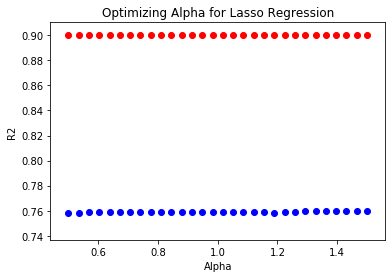

In [693]:
from sklearn.linear_model import Lasso #### try alphas; check adj R^2
a = .05
results = []

for a in np.linspace(.5, 1.5, num=30):
    Lassoreg = Lasso(alpha= a, max_iter = 1000000000, normalize = False)
    Lassoreg.fit(X, y)
    L_target_prediction = Lassoreg.predict(X_test)
    lassCoef = Lassoreg.coef_
    
    count = 0
    
    for i in Lassoreg.coef_: ### If the coef is significantly small the term is considered removed
        if abs(i) < .01:
            count += 1       ### Here is the numver of terms removed
    
    R2 = Lassoreg.score(X, y)
    n = len(X)
    k = len(X.columns) - count     ### here the original number of terms is subtracted by the insignificant terms
    adjR2 = R2 - ((n - 1)/(n - k)) * (1 - R2)
    
    results.append((a, R2, adjR2))

    plt.scatter(x=a, y = adjR2, c='b')
    plt.scatter(x=a, y = R2, c='r')
    plt.xlabel('Alpha')
    plt.ylabel('R2')
    plt.title('Optimizing Alpha for Lasso Regression')
results   
    #print(f'Adjusted R2: {adjR2}')

# Final model - Incorperating all the data for the best model

In [694]:
Lassoreg = Lasso(alpha= 1.34, max_iter = 1000000000, normalize = False)
Lassoreg.fit(X, y)
L_target_prediction = Lassoreg.predict(X)
lassCoef = Lassoreg.coef_

count = 0
for i in Lassoreg.coef_:
    if abs(i) < .01:
        count += 1
    
R2 = Lassoreg.score(X, y)
n = len(X)
k = len(X.columns) - count
adjR2 = R2 - ((n - 1)/(n - k)) * (1 - R2)
rmse = (mean_squared_error(y, L_target_prediction))**.5

print(f'rmse: {rmse}')
print(f'saleprice mean: {y.SalePrice.mean()}')
print(f'Adjusted R2: {adjR2}') 
print(f'R2: {Lassoreg.score(X, y)}')

rmse: 22242.281922013546
saleprice mean: 177160.73573573574
Adjusted R2: 0.7594046798964573
R2: 0.8998751696847417


In [695]:
coef_col =  {}

for i in range(len(Lassoreg.coef_)):
    coef_col[Lassoreg.coef_[i]] =  train_combined.columns[i] 
for key in sorted(coef_col.keys()):
    print(f'{key}, {coef_col[key]}')

-80529.07523540696, SaleCondition_Alloca
-75636.38725437885, BedroomAbvGr_5
-72733.04826367398, Functional_Sev
-71431.92192911956, BedroomAbvGr_3
-68225.12955313492, BedroomAbvGr_1
-66751.70109679713, BedroomAbvGr_2
-64040.07280665028, BedroomAbvGr_4
-63978.387090167686, Functional_Maj2
-48591.33910682875, BedroomAbvGr_6
-35757.67369690388, BsmtHalfBath_2
-34219.58525283008, Neighborhood_MeadowV
-30337.85008354197, Neighborhood_ClearCr
-29917.454355090722, Neighborhood_Edwards
-29727.513650783396, BldgType_Twnhs
-28047.835898843008, Neighborhood_Mitchel
-25904.669363252975, Neighborhood_SWISU
-24199.726290496892, Neighborhood_NWAmes
-24191.428717207822, Electrical_None
-23711.500322758457, Neighborhood_NAmes
-23117.72115160244, Neighborhood_Gilbert
-22659.298508885215, RoofStyle_Gable
-20756.754164553306, Neighborhood_Sawyer
-20124.252031545097, Heating_Grav
-19777.34470018908, BldgType_TwnhsE
-19434.691990714957, TotRmsAbvGrd_3
-17320.32149867843, LotConfig_FR3
-17243.065382696626, Ho

# Incorporating Additional Data Sources

#### I can incorporate more data by combining relevent data sources, merging on the date

In [579]:
from bs4 import BeautifulSoup
import requests

req = requests.get('https://www.hsh.com/monthly-mortgage-rates.html')
req

<Response [200]>

In [65]:
soup = BeautifulSoup(req.content, 'html5lib')
#soup.findAll('tr')

## Confirming Assumptions are upheld

### No Collinearity between features

In [696]:
test_colinear(train_combined)

[]

In [697]:
corr_saleprice = {}
for i, k in test_colinear(train_combined):
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])
    corr_saleprice[k] = train_combined[f'{k}'].corr(targetdf['SalePrice'])
corr_saleprice

{}

### Normal distribution of residual: Q-Q plot

In [699]:
residuals = L_target_prediction - y.SalePrice

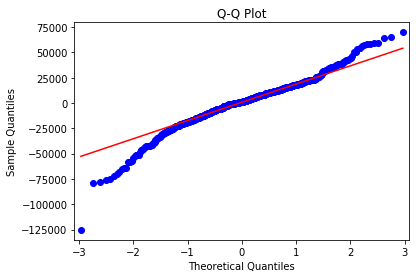

In [700]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='q');
plt.title('Q-Q Plot');

### Homoscedasticity:

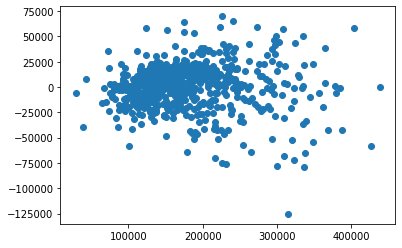

In [701]:
plt.scatter(x = L_target_prediction, y = residuals);

### No AutoCorrelation

#### Durbin-Watson Test

In [702]:
import statsmodels.stats.stattools as stools
stools.durbin_watson(residuals)


2.156403685486642

Value is extremely close to 2, by definition a value of 2 means there is no auto correlation.

### Implementation of XGBoost


In [704]:
import xgboost
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [718]:
XGBoost = XGBRegressor(max_depth=20, )
XGBoost.fit(X_train, y_train,)

y_pred = XGBoost.predict(X_test)
XGBoost_mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(XGBoost_mse))

XGBoostError: [19:01:52] src/objective/objective.cc:23: Unknown objective function rmse
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012ec6d579 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x000000012ecf424d xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&) + 541
  [bt] (2) 3   libxgboost.dylib                    0x000000012ec72b0a xgboost::LearnerImpl::LazyInitModel() + 1402
  [bt] (3) 4   libxgboost.dylib                    0x000000012ec882fe XGBoosterUpdateOneIter + 158
  [bt] (4) 5   libffi.6.dylib                      0x0000000106253884 ffi_call_unix64 + 76
  [bt] (5) 6   ???                                 0x00007ffeeb53d7a0 0x0 + 140732846561184

